# Effect of learning rate

In this notebook, we will discuss the impact of learning rate, which will determine step size and change the distance from initialzation to the solution, which contributes to breaking the NTK regime.

In [1]:
import torch
from torch import optim, nn
from torchvision import datasets, transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import copy
import os
import random
from models import train_ntk
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

# training parameters
batch_size = 128

transform = transforms.Compose([
        transforms.ToTensor()
])
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, download=True, transform=transform),
    batch_size=batch_size, shuffle=True)

In [2]:
h_dim = 5000
train_epoch = 100
alpha_set = [h_dim**(0.1*k) for k in range(11)]
alpha = alpha_set[5]

In [3]:
srr1,saa1,sll1 = train_ntk(train_loader, test_loader,h_dim,alpha,train_epoch,1)

srr2,saa2,sll2 = train_ntk(train_loader, test_loader,h_dim,alpha,train_epoch,.1)

srr3,saa3,sll3 = train_ntk(train_loader, test_loader,h_dim,alpha,train_epoch,.01)

epoch 0 loss (train,test):1.90e+00;2.57e+00 acc:0.923200
dtheta: 0.44567433
du: 47.30221308858293
epoch 1 loss (train,test):7.26e-01;1.53e+00 acc:0.937600
dtheta: 0.5530165
du: 55.620163382038335
epoch 2 loss (train,test):2.39e-01;1.17e+00 acc:0.954000
dtheta: 0.61414045
du: 59.994618506462835
epoch 3 loss (train,test):1.61e-01;1.03e+00 acc:0.950900
dtheta: 0.6482883
du: 62.44524279844392
epoch 4 loss (train,test):1.21e-01;8.27e-01 acc:0.964000
dtheta: 0.6729227
du: 64.19913753769141
epoch 5 loss (train,test):1.89e-02;7.84e-01 acc:0.965900
dtheta: 0.6848007
du: 65.05981833113238
epoch 6 loss (train,test):1.37e-02;7.65e-01 acc:0.967000
dtheta: 0.6952396
du: 65.77741900324857
epoch 7 loss (train,test):4.06e-02;8.15e-01 acc:0.964400
dtheta: 0.6998292
du: 66.14070376398821
epoch 8 loss (train,test):4.28e-02;8.32e-01 acc:0.964000
dtheta: 0.7039812
du: 66.41210418028926
epoch 9 loss (train,test):8.11e-06;7.87e-01 acc:0.967400
dtheta: 0.7072582
du: 66.66895550448434
epoch 10 loss (train,test)

epoch 84 loss (train,test):1.40e-07;6.75e-01 acc:0.970100
dtheta: 0.7095628
du: 66.83600875324214
epoch 85 loss (train,test):2.41e-07;6.64e-01 acc:0.970100
dtheta: 0.7095628
du: 66.83602139729668
epoch 86 loss (train,test):1.51e-07;6.69e-01 acc:0.970100
dtheta: 0.7095628
du: 66.83602982666639
epoch 87 loss (train,test):2.35e-07;6.64e-01 acc:0.970100
dtheta: 0.70956284
du: 66.83604247072094
epoch 88 loss (train,test):2.52e-07;6.69e-01 acc:0.970100
dtheta: 0.7095628
du: 66.83605090009064
epoch 89 loss (train,test):1.04e-07;6.64e-01 acc:0.970100
dtheta: 0.7095628
du: 66.83605932946034
epoch 90 loss (train,test):2.69e-08;6.64e-01 acc:0.970100
dtheta: 0.7095628
du: 66.83606354414519
epoch 91 loss (train,test):2.51e-07;6.75e-01 acc:0.970100
dtheta: 0.7095628
du: 66.83607618819974
epoch 92 loss (train,test):5.66e-08;6.64e-01 acc:0.970100
dtheta: 0.7095628
du: 66.83608461756945
epoch 93 loss (train,test):1.39e-07;7.00e-01 acc:0.970100
dtheta: 0.70956284
du: 66.83609304693915
epoch 94 loss (tra

epoch 67 loss (train,test):1.16e-03;1.32e-01 acc:0.970200
dtheta: 0.025748217
du: 11.57898999367215
epoch 68 loss (train,test):1.42e-03;1.18e-01 acc:0.969800
dtheta: 0.025846628
du: 11.603556337997938
epoch 69 loss (train,test):1.31e-03;1.18e-01 acc:0.970000
dtheta: 0.025944207
du: 11.62782027868566
epoch 70 loss (train,test):1.25e-03;1.22e-01 acc:0.969800
dtheta: 0.026040606
du: 11.651800781817146
epoch 71 loss (train,test):1.17e-03;1.18e-01 acc:0.970000
dtheta: 0.02613584
du: 11.675492579036332
epoch 72 loss (train,test):9.20e-04;1.18e-01 acc:0.970300
dtheta: 0.026230268
du: 11.69880083993407
epoch 73 loss (train,test):1.25e-03;1.22e-01 acc:0.970300
dtheta: 0.02632359
du: 11.721816180234656
epoch 74 loss (train,test):1.11e-03;1.19e-01 acc:0.970500
dtheta: 0.026415937
du: 11.744527009554751
epoch 75 loss (train,test):1.11e-03;1.19e-01 acc:0.970300
dtheta: 0.02650697
du: 11.766989172468632
epoch 76 loss (train,test):1.15e-03;1.19e-01 acc:0.970100
dtheta: 0.026596924
du: 11.789232171770

epoch 49 loss (train,test):1.75e-02;9.98e-02 acc:0.970400
dtheta: 0.006390544
du: 6.0095558101304
epoch 50 loss (train,test):1.77e-02;9.92e-02 acc:0.970400
dtheta: 0.0064759315
du: 6.049396172356535
epoch 51 loss (train,test):1.82e-02;9.95e-02 acc:0.970200
dtheta: 0.00656031
du: 6.0885521751299745
epoch 52 loss (train,test):1.99e-02;9.95e-02 acc:0.969500
dtheta: 0.0066439253
du: 6.126945846780973
epoch 53 loss (train,test):2.05e-02;1.01e-01 acc:0.970000
dtheta: 0.006726413
du: 6.164759472429342
epoch 54 loss (train,test):2.06e-02;1.07e-01 acc:0.969700
dtheta: 0.006807952
du: 6.201872933556822
epoch 55 loss (train,test):2.03e-02;1.03e-01 acc:0.970400
dtheta: 0.0068886643
du: 6.238429529448353
epoch 56 loss (train,test):2.08e-02;9.92e-02 acc:0.970200
dtheta: 0.0069685257
du: 6.274272789928837
epoch 57 loss (train,test):1.59e-02;1.00e-01 acc:0.969300
dtheta: 0.007047517
du: 6.309517565160465
epoch 58 loss (train,test):1.66e-02;9.97e-02 acc:0.969800
dtheta: 0.0071258745
du: 6.3441696503349

## Plot

According to the notebook, a large learning rate will directly break the NTK regime. Since all the proof are approximating the gradient flow (infinite small learning rate), a large step makes the parameter get out of the initialization neighborhood.

(array([93.5, 94. , 94.5, 95. , 95.5, 96. , 96.5, 97. , 97.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

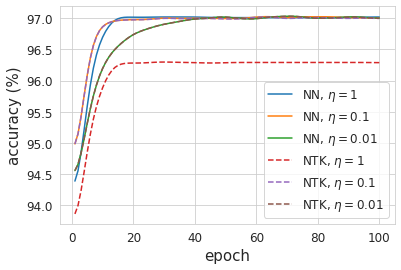

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from scipy.ndimage.filters import gaussian_filter1d


plt.plot(np.arange(train_epoch)+1,100*gaussian_filter1d(np.array(saa1)[:,0],3),label = r'NN, $\eta = 1$')
plt.plot(np.arange(train_epoch)+1,100*gaussian_filter1d(np.array(saa2)[:,0],3),label = r'NN, $\eta = 0.1$')
plt.plot(np.arange(train_epoch)+1,100*gaussian_filter1d(np.array(saa3)[:,0],3),label = r'NN, $\eta = 0.01$')

plt.plot(np.arange(train_epoch)+1,100*gaussian_filter1d(np.array(saa1)[:,1],3),linestyle='dashed',label = r'NTK, $\eta = 1$')
plt.plot(np.arange(train_epoch)+1,100*gaussian_filter1d(np.array(saa2)[:,1],3),linestyle='dashed',label = r'NTK, $\eta = 0.1$')
plt.plot(np.arange(train_epoch)+1,100*gaussian_filter1d(np.array(saa3)[:,1],3,),linestyle='dashed',label = r'NTK, $\eta = 0.01$')
#plt.plot(np.arange(50)+1,np.array(srr4)[:,0],label = r'$\alpha = m^{0.7}$')

plt.legend()

plt.ylabel(r'accuracy (%)',fontsize=15)
plt.xlabel('epoch',fontsize=15)
#plt.ylim([0.8,0.99])
#plt.yscale('log')
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

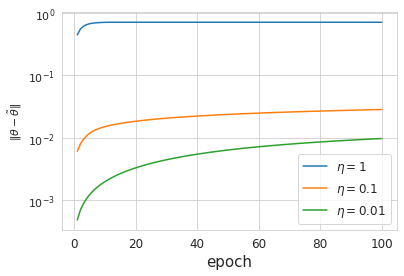

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


plt.plot(np.arange(train_epoch)+1,np.array(srr1)[:,0],label = r'$\eta = 1$')
plt.plot(np.arange(train_epoch)+1,np.array(srr2)[:,0],label = r'$\eta = 0.1$')
plt.plot(np.arange(train_epoch)+1,np.array(srr3)[:,0],label = r'$\eta = 0.01$')

plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

plt.ylabel(r'${\Vert \theta-\tilde{\theta} \Vert}$',fontsize=11)
plt.xlabel('epoch',fontsize=15)
#plt.ylim([0.1,10])
plt.yscale('log')

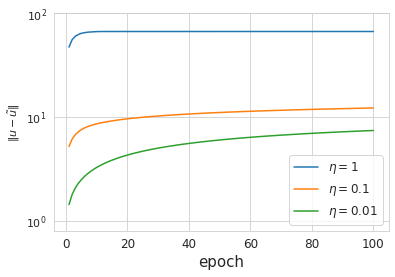

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


plt.plot(np.arange(train_epoch)+1,np.array(srr1)[:,1],label = r'$\eta = 1$')
plt.plot(np.arange(train_epoch)+1,np.array(srr2)[:,1],label = r'$\eta = 0.1$')
plt.plot(np.arange(train_epoch)+1,np.array(srr3)[:,1],label = r'$\eta = 0.01$')

plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

plt.ylabel(r'${\Vert u-\tilde{u} \Vert}$',fontsize=11)
plt.xlabel('epoch',fontsize=15)
plt.ylim([0.8,100])
plt.yscale('log')